In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import os
import math
from itertools import chain
import ast

In [185]:
bigdf=pd.read_csv("bigdf.csv") 
bigdf.head(15)

,C_Department,C_Number,C_CatNum,C_ID,C_Semester,C_Year,C_Term,C_Overall,C_Workload,C_Difficulty,C_Recommendation,C_Enrollment,C_ResponseRate,I_First,I_Last,I_ID,I_Overall,I_EffectiveLectures,I_Accessible,I_GeneratesEnthusiasm,I_EncouragesParticipation,I_UsefulFeedback,I_ReturnsAssignmentsTimely,QOverall_1,QOverall_2,QOverall_3,QOverall_4,QOverall_5,QDifficulty_1,QDifficulty_2,QDifficulty_3,QDifficulty_4,QDifficulty_5,QWorkload_1,QWorkload_2,QWorkload_3,QWorkload_4,QWorkload_5,Comments,Sem_Average,Positive
0,HISTSCI,270,58523,2697,Spring '12,2011,2,4.67,2.33,3.33,5.00,6,50.00,Rebecca,Lemov,79de794d3e2e19eb71a2033b0ec0b76d,4.67,4.33,4.00,4.33,5.00,4.50,4.00,0,0,0,1,2,0,0,2,1,0,0,2,1,0,0,[u'This course is a perfect example of what gr...,4.226350,True
1,EXPOS,20.132,22108,1676,Fall '14,2014,1,4.10,7.10,NaN,3.50,13,76.92,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.50,4.60,3.70,3.90,3.90,4.10,4.60,0,1,1,4,4,0,1,2,7,3,1,3,4,1,0,"[u'The class has a fairly high work load, but ...",4.244370,False
2,EXPOS,20.132,22108,1676,Fall '13,2013,1,3.50,2.60,3.90,3.20,13,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,3.80,4.00,2.50,3.50,4.10,4.30,4.40,0,1,1,4,4,0,1,2,7,3,1,3,4,1,0,[u'Philosophy of the State with Dr. Chen offer...,4.256888,False
3,EXPOS,20.132,22108,1676,Fall '12,2012,1,3.73,2.47,3.67,3.47,15,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,3.87,4.33,2.64,3.93,4.18,3.64,3.82,0,1,1,4,4,0,1,2,7,3,1,3,4,1,0,[u'This was by far my favorite course. Dr. Che...,4.190299,False
4,EXPOS,20.132,22108,1676,Fall '11,2011,1,3.85,2.00,3.54,3.62,13,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.08,3.75,3.31,3.92,4.46,4.23,4.08,0,1,1,4,4,0,1,2,7,3,1,3,4,1,0,"[u'Be prepared to read', u'Discussions were gr...",4.185893,False
5,EXPOS,20.133,88737,1677,Spring '13,2012,2,4.42,2.58,3.50,4.58,12,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.67,4.50,4.08,4.42,4.70,4.60,4.30,0,0,3,7,2,0,0,7,4,1,0,6,5,1,0,NaN,4.209033,True
6,EXPOS,20.133,88737,1677,Spring '12,2011,2,NaN,NaN,NaN,NaN,14,78.57,NaN,NaN,1341ccb7bd27f47e68625b63b15281d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,7,2,0,0,7,4,1,0,6,5,1,0,[u'This is a fantastic course if you have an i...,4.226350,False
7,EXPOS,20.133,88737,1677,Spring '14,2013,2,3.90,2.60,3.50,3.90,14,85.71,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.20,4.60,3.80,3.90,4.40,4.00,3.70,0,0,3,7,2,0,0,7,4,1,0,6,5,1,0,[u'This is not a bad Expos course. Dr. Chen is...,4.238289,False
8,GOV,94sl,52322,2187,Spring '13,2012,2,4.33,2.33,3.20,4.67,8,75.00,Shawn Ling,Ramirez,598dde89ef1a896915101110504b9e73,4.67,4.80,4.67,4.60,4.67,4.67,4.67,0,0,1,2,3,0,0,4,1,0,0,4,2,0,0,[u'Readings are decent and give good exposure ...,4.209033,True
9,SOCIOL,263,82536,4712,Spring '13,2012,2,4.67,3.00,3.33,5.00,7,85.71,Orlando,Patterson,c197af23215b1e2c00da3a19634ab1a5,4.67,4.67,4.33,4.83,4.60,4.80,4.60,0,0,2,1,5,0,0,5,2,1,1,3,4,0,0,[u'Excellent course! Listening to Orlando weav...,4.209033,True


In [4]:
bigdf["C_Department"].head(5)

0    HISTSCI
1      EXPOS
2      EXPOS
3      EXPOS
4      EXPOS
Name: C_Department, dtype: object

In [16]:
bigdf["C_Overall"].head(20) 

0     4.67
1     4.10
2     3.50
3     3.73
4     3.85
5     4.42
6      NaN
7     3.90
8     4.33
9     4.67
10    4.33
11    4.40
12    3.89
13    3.80
14    3.60
15    3.86
16    4.50
17    4.20
18    3.89
19     NaN
Name: C_Overall, dtype: float64

Mean: 4.17592001074
Median: 4.25


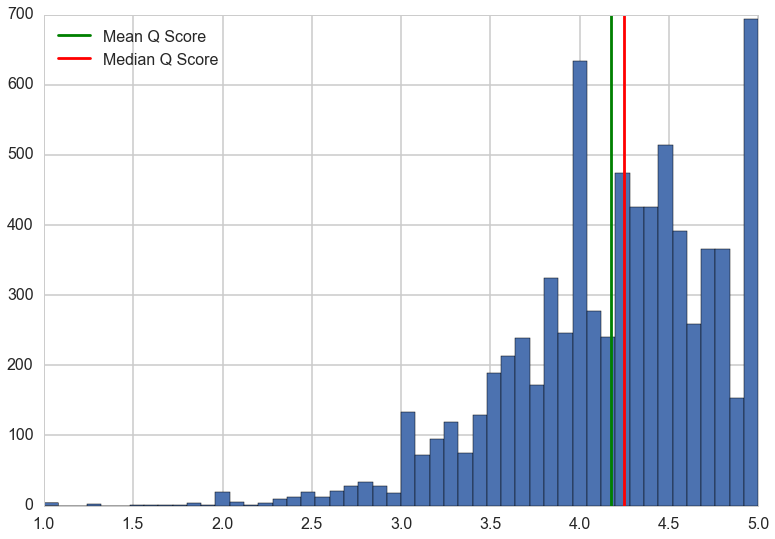

In [126]:
# first, we plot the overall distribution of Q-scores as a part of our exploratory analysis. We can observe 
# that there is a high density of scores around the 4-5 range, with a mean of 4.18 and a median of 4.25, indicating that the histogram is skewed left.           
bigdf.C_Overall.hist(bins=50) 
mean = plt.axvline(bigdf.C_Overall.mean(), color = 'green', label = "Mean Q Score") 
median = plt.axvline(bigdf.C_Overall.median(), color = 'red', label = "Median Q Score") 
plt.legend(loc = 'upper left') 
print "Mean:",bigdf.C_Overall.mean() 
print "Median:", bigdf.C_Overall.median()

    




In [146]:
#Next week can sort the departments by their mean and rank the top departments using the groupby and sort functions.  
dep = bigdf.C_Department  
deplist = dep.tolist()  
# float(deplist.count("EXPOS"))/float(len(deplist))    
deprank = bigdf.groupby("C_Department").C_Overall.mean()  
deprank.sort() 
print deprank.head(5) 
print deprank.tail(7)

#We can see that the CHEMBIO department has the lowest Q score at 3.1167 and the PLSH, GIKUYU, PAL, MEDGREEK have the highest Q scores of 5, most likely due to a very low number of reviews.  This is pretty expected, tough departments like CHEMBIO and APMTH and SCI-PHYUNV have low Q scores while very small departments whose students most likely are self-selected and love the subject matter have high Q score ratings.   

C_Department
CHEMBIO       3.116667
BCMP          3.446429
APPHY         3.577692
SCI-PHYUNV    3.585806
APMTH         3.653625
Name: C_Overall, dtype: float64
C_Department
ROM-LANG    4.966667
GIKUYU      5.000000
PAL         5.000000
MEDGREEK    5.000000
PLSH        5.000000
BUSSTUD          NaN
UYGHUR           NaN
Name: C_Overall, dtype: float64


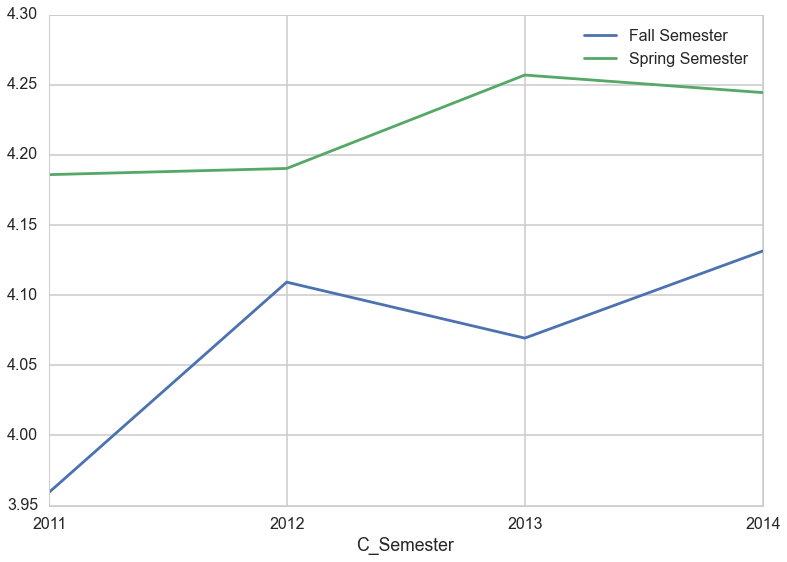

In [184]:
#Let's see if there are any other trends we can explore besides department, such as semester.   
semrank = bigdf.groupby("C_Semester").C_Overall.mean()  
semrank  
semrank[0:4].plot(label = "Fall Semester") 
semrank[5:9].plot(label="Spring Semester")  
plt.xticks(range(4),['2011','2012','2013','2014']) 
plt.legend()
#No large discrepancies with the semester rank here.  It is worth noting that the Q scores have been on the upswing over time, but there doesn't seem to be any obvious or significant other trends. 

In [189]:
# We need to consider the workload Q score and difficulty Q score for classes in Fall 2014 because beginning in Fall 2014, the Q survey decided to stop taking into consideration a Q difficulty score by rather the number of hours spent in a class per week. 
# We will choose to drop these classes from Fall 2014.  
bigdf = bigdf[bigdf.C_Semester != "Fall '14"] 


In [248]:
#We continue to clean our data set by deleting repetitive and unneeded columns like Q_Overall, QDifficulty, and QWorkload 
cleandf = bigdf 
cleandf = cleandf.drop(cleandf.columns[[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]], axis=1)

In [255]:
#We now must declare a response variable for which we classify reviews by.  Because the objective of the analysis is to predict how well a class is scored, we will classify each class as having a high Q score (2) , medium Q score (1), or low Q score (0).
cleandf['QPRED'] = 0
condition = cleandf['C_Overall'] <= 3.5
cleandf.loc[condition, 'QPRED'] = 1

condition2 = cleandf['C_Overall'] > 3.5
condition3 = cleandf['C_Overall'] <= 4.2
cleandf.loc[condition2&condition3, 'QPRED'] = 1 
condition4 = cleandf['C_Overall'] > 4.2 
cleandf.loc[condition4, 'QPRED'] = 2 


In [256]:
cleandf

,C_Department,C_Number,C_CatNum,C_ID,C_Semester,C_Year,C_Term,C_Overall,C_Workload,C_Difficulty,C_Recommendation,C_Enrollment,C_ResponseRate,I_First,I_Last,I_ID,I_Overall,I_EffectiveLectures,I_Accessible,I_GeneratesEnthusiasm,I_EncouragesParticipation,I_UsefulFeedback,I_ReturnsAssignmentsTimely,Comments,Sem_Average,Positive,QPRED
0,HISTSCI,270,58523,2697,Spring '12,2011,2,4.67,2.33,3.33,5.00,6,50.00,Rebecca,Lemov,79de794d3e2e19eb71a2033b0ec0b76d,4.67,4.33,4.00,4.33,5.00,4.50,4.00,[u'This course is a perfect example of what gr...,4.226350,True,2
2,EXPOS,20.132,22108,1676,Fall '13,2013,1,3.50,2.60,3.90,3.20,13,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,3.80,4.00,2.50,3.50,4.10,4.30,4.40,[u'Philosophy of the State with Dr. Chen offer...,4.256888,False,1
3,EXPOS,20.132,22108,1676,Fall '12,2012,1,3.73,2.47,3.67,3.47,15,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,3.87,4.33,2.64,3.93,4.18,3.64,3.82,[u'This was by far my favorite course. Dr. Che...,4.190299,False,1
4,EXPOS,20.132,22108,1676,Fall '11,2011,1,3.85,2.00,3.54,3.62,13,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.08,3.75,3.31,3.92,4.46,4.23,4.08,"[u'Be prepared to read', u'Discussions were gr...",4.185893,False,1
5,EXPOS,20.133,88737,1677,Spring '13,2012,2,4.42,2.58,3.50,4.58,12,100.00,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.67,4.50,4.08,4.42,4.70,4.60,4.30,NaN,4.209033,True,2
6,EXPOS,20.133,88737,1677,Spring '12,2011,2,NaN,NaN,NaN,NaN,14,78.57,NaN,NaN,1341ccb7bd27f47e68625b63b15281d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[u'This is a fantastic course if you have an i...,4.226350,False,0
7,EXPOS,20.133,88737,1677,Spring '14,2013,2,3.90,2.60,3.50,3.90,14,85.71,Owen,Chen,1341ccb7bd27f47e68625b63b15281d1,4.20,4.60,3.80,3.90,4.40,4.00,3.70,[u'This is not a bad Expos course. Dr. Chen is...,4.238289,False,1
8,GOV,94sl,52322,2187,Spring '13,2012,2,4.33,2.33,3.20,4.67,8,75.00,Shawn Ling,Ramirez,598dde89ef1a896915101110504b9e73,4.67,4.80,4.67,4.60,4.67,4.67,4.67,[u'Readings are decent and give good exposure ...,4.209033,True,2
9,SOCIOL,263,82536,4712,Spring '13,2012,2,4.67,3.00,3.33,5.00,7,85.71,Orlando,Patterson,c197af23215b1e2c00da3a19634ab1a5,4.67,4.67,4.33,4.83,4.60,4.80,4.60,[u'Excellent course! Listening to Orlando weav...,4.209033,True,2
10,SOCIOL,263,82536,4712,Spring '12,2011,2,4.33,2.67,2.83,4.00,8,75.00,Orlando,Patterson,c197af23215b1e2c00da3a19634ab1a5,4.17,4.20,4.25,4.67,4.40,4.60,4.40,NaN,4.226350,True,2


In [257]:
#Because we are predicting for a semester, Spring '14, let's split the dataset into training and test sets for this purpose.  
test = cleandf.loc[cleandf['C_Semester'] == "Spring '14"] 

train = cleandf[cleandf.C_Semester != "Spring '14"]  

In [252]:
#We can check the lengths of our training and testing set.  
print "Test is ", len(test) 
print "Train is ", len(train)

Test is  767
Train is  6153


In [284]:
#We now create a list of variables to be used in our classifier
lcols=list(train.columns) 
lcols.remove('C_Department')  
lcols.remove('C_Number')  
lcols.remove('C_CatNum')  
lcols.remove('C_ID') 
lcols.remove('C_Semester')  
lcols.remove('C_Year')  
lcols.remove('C_Term')  
lcols.remove('C_Overall') 
lcols.remove('I_First') 
lcols.remove('I_Last') 
lcols.remove('I_ID')  
lcols.remove('Comments')  
lcols.remove('Positive') 
lcols.remove('QPRED') 
lcols

['C_Workload',
 'C_Difficulty',
 'C_Recommendation',
 'C_Enrollment',
 'C_ResponseRate',
 'I_Overall',
 'I_EffectiveLectures',
 'I_Accessible',
 'I_GeneratesEnthusiasm',
 'I_EncouragesParticipation',
 'I_UsefulFeedback',
 'I_ReturnsAssignmentsTimely',
 'Sem_Average']

In [285]:
#We need to make sure that our training and test set do not contain NaN values.  
 
train = train.dropna(how='any') 
test = test.dropna(how='any') 


In [291]:
#We will not train a SVM classifier.  
from sklearn.svm import LinearSVC 

clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

Xmatrix_train=train[lcols].values
Xmatrix_test=test[lcols].values
Yresp_train=train['QPRED'].values
Yresp_test=test['QPRED'].values 

In [297]:
#We will now use GridSearchCV over the parameter grid of regularization coefficients in the Cs array to get the best fit classifier using 5-fold cross validation.
from sklearn.grid_search import GridSearchCV
gs=GridSearchCV(clfsvm, param_grid={'C':Cs}, cv=5)
gs.fit(Xmatrix_train, Yresp_train)
print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_

BEST {'C': 0.1} 0.884115619199 [mean: 0.76850, std: 0.01788, params: {'C': 0.001}, mean: 0.86661, std: 0.00288, params: {'C': 0.01}, mean: 0.88412, std: 0.00951, params: {'C': 0.1}, mean: 0.87192, std: 0.01649, params: {'C': 1.0}, mean: 0.84513, std: 0.03812, params: {'C': 10.0}, mean: 0.79952, std: 0.12442, params: {'C': 100.0}]


In [298]:
best = gs.best_estimator_
best.fit(Xmatrix_train, Yresp_train)
best.score(Xmatrix_test, Yresp_test)

0.89738430583501005

In [321]:
# We will now train another classifier using random forest
# from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier  
from sklearn import ensemble
# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xmatrix_train, Yresp_train) 

# clf = RandomForestClassifier(n_jobs=2)
# y, _ = pd.factorize(train['species'])
# clf.fit(train[features], y)

# preds = iris.target_names[clf.predict(test[features])]
# pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [322]:
#We can check the accuracy of our random forest classifier by plotting it against a ROC curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# overall accuracy
acc = rf.score(Xmatrix_test,Yresp_test) 
acc

# get roc/auc info
# Y_score = rf.decision_function(Xmatrix_test)
# fpr = dict()
# tpr = dict()
# fpr, tpr, _ = roc_curve(Yresp_test, Y_score)

# roc_auc = dict()
# roc_auc = auc(fpr, tpr)

# # make the plot
# plt.figure(figsize=(10,10))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([-0.05, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid(True)
# plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
# plt.legend(loc="lower right", shadow=True, fancybox =True) 

0.8953722334004024

In [326]:
#We not implement a logistic regression to predict Q scores. 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model = model.fit(Xmatrix_train, Yresp_train)

# check the accuracy on the training set
print "Training accuracy is", model.score(Xmatrix_train, Yresp_train) 

#check the accuracy on test set 
print "Test accuracy is ", model.score(Xmatrix_test, Yresp_test)


Training accuracy is 0.896579156722
Test accuracy is  0.907444668008
